In [22]:
#import things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
#making functions

def function_v(P, r,n, t):
    v = P*(1+(r/n))**(n*t)
    return v

fn_v = lambda P, r, n, t: P*(1+(r/n))**(n*t)

In [24]:
#function with data

data  = pd.DataFrame()
data["age"]                   = [18,29,15,32,6]
data["num_underage_siblings"] = [0,0,1,1,0]
data["num_adult_siblings"]    = [1,0,0,1,0]

votefn = lambda age: "yes" if age>=18 else "no"
data["can_vote"] = data["age"].apply(votefn)
data["can_vote"] = list(map(votefn,data["age"]))

fn_sum = lambda x,y: x+y
data["num_siblings"] = list(map(fn_sum, data["num_underage_siblings"], data["num_adult_siblings"]))

display(data)

,age,num_underage_siblings,num_adult_siblings,can_vote,num_siblings
0,18,0,1,yes,1
1,29,0,0,yes,0
2,15,1,0,no,1
3,32,1,1,yes,2
4,6,0,0,no,0


In [ ]:
#query and global variable

carfeatures = pd.read_csv("lecture_10/data_raw/features.csv")
carfeatures["weight"].describe() #for summary statistics

#query (the following three are the same)
a = carfeatures[(carfeatures['acceleration']>=10) & (carfeatures['acceleration']<18)]
b = carfeatures.query("acceleration>=10 & acceleration<18")
c = carfeatures.query("acceleration>=10 and acceleration<18")

#with global variables
x=10; y=18
carfeatures[(carfeatures['acceleration']>=x) & (carfeatures['acceleration']<y)]
carfeatures.query("acceleration>=@x & acceleration<@y")


In [ ]:
#sorting and observing high values
carfeatures = pd.read_csv("lecture_10/data_raw/features.csv")
carsorted = carfeatures.sort_values(by = "mpg", ascending = False) #sorted by mpg (big to small)

carsorted.iloc[:10,:] #top 10 observation
carsorted.iloc[0:10,:] #same thing


In [ ]:
#split into subset of two groups
carfeatures = pd.read_csv("lecture_10/data_raw/features.csv")
np.random.seed(42)
carfeatures["status"] = np.random.choice(["Treatment","Control"],
                                         size = len(carfeatures),
                                         p = [0.4,0.6])

treatmentgrp = carfeatures.query('status=="Treatment"')
controlgrp = carfeatures.query('status=="Control"')

display(treatmentgrp.describe())
display(controlgrp.describe())

Text(0.5, 1.0, 'Example graph')

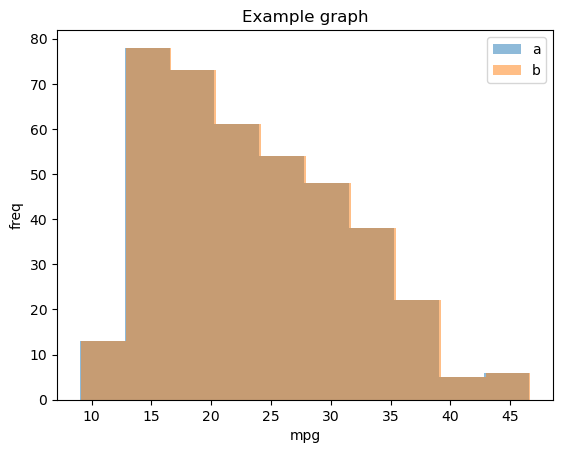

In [74]:
#histogram (f)
plt.hist (x=carfeatures["mpg"],alpha=0.5)
plt.hist (x=carfeatures["mpg"]+0.1,alpha=0.5)
plt.legend(["a","b"])
plt.xlabel("mpg")
plt.ylabel("freq")
plt.title("Example graph")



<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups